In [38]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import datetime as dp
%matplotlib inline

In [13]:
visa = pdr.DataReader('V', data_source='yahoo', start='2018-01-01')
visa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,115.080002,113.949997,114.570000,114.510002,6080900.0,112.674698
2018-01-03,115.790001,114.660004,114.949997,115.650002,6946100.0,113.796410
2018-01-04,117.360001,116.029999,116.250000,116.080002,7805300.0,114.219521
2018-01-05,119.000000,116.419998,116.989998,118.860001,8590500.0,116.954979
2018-01-08,120.480003,118.070000,118.610001,119.339996,6660700.0,117.427277
...,...,...,...,...,...,...
2020-07-16,195.710007,192.520004,195.330002,193.500000,5064000.0,193.500000
2020-07-17,195.570007,193.119995,194.830002,195.089996,6395000.0,195.089996
2020-07-20,199.479996,193.669998,194.740005,198.470001,6985300.0,198.470001


In [17]:
visa['pct_change'] = visa['Close'].pct_change() * 100
visa

,High,Low,Open,Close,Volume,Adj Close,pct_change
Date,,,,,,,
2018-01-02,115.080002,113.949997,114.570000,114.510002,6080900.0,112.674698,NaN
2018-01-03,115.790001,114.660004,114.949997,115.650002,6946100.0,113.796410,0.995546
2018-01-04,117.360001,116.029999,116.250000,116.080002,7805300.0,114.219521,0.371812
2018-01-05,119.000000,116.419998,116.989998,118.860001,8590500.0,116.954979,2.394899
2018-01-08,120.480003,118.070000,118.610001,119.339996,6660700.0,117.427277,0.403833
...,...,...,...,...,...,...,...
2020-07-16,195.710007,192.520004,195.330002,193.500000,5064000.0,193.500000,-1.551770
2020-07-17,195.570007,193.119995,194.830002,195.089996,6395000.0,195.089996,0.821704
2020-07-20,199.479996,193.669998,194.740005,198.470001,6985300.0,198.470001,1.732536


In [15]:
visa['pct_change'].hist(bins=10)

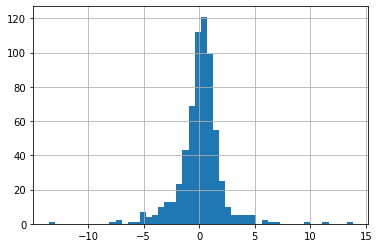

In [39]:
visa['pct_change'].hist(bins=50)

In [20]:
start = '2015-01-01'
end = '2020-01-01'

In [27]:
ford = pdr.DataReader('F', 'yahoo', start, end)
tesla = pdr.DataReader('TSLA', 'yahoo', start, end)
gm = pdr.DataReader('GM', 'yahoo', start, end)

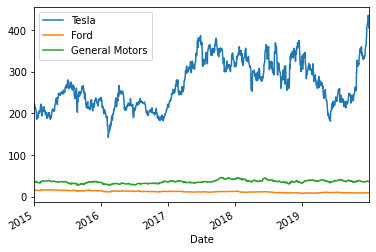

In [40]:
tesla['Open'].plot(label='Tesla')
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='General Motors')
plt.legend()

# Market-cap

In [43]:
tesla['DollarVolume'] = tesla['Open'] * tesla['Volume']
ford['DollarVolume'] = ford['Open'] * ford['Volume']
gm['DollarVolume'] = gm['Open'] * gm['Volume']

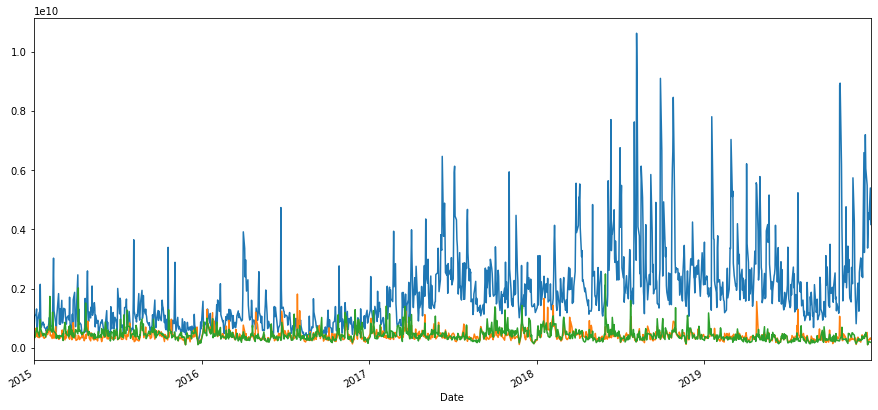

In [44]:
tesla['DollarVolume'].plot(label='Tesla', figsize=(15, 7))
ford['DollarVolume'].plot(label='ford')
gm['DollarVolume'].plot(label='GM')

# Scatter plot

In [53]:
car_comp = pd.concat(objs=[tesla['Open'], ford['Open'], gm['Open']], axis=1)
car_comp.columns = ['Tesla', 'Ford', 'GM']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001E54D048>,
      dtype=object)

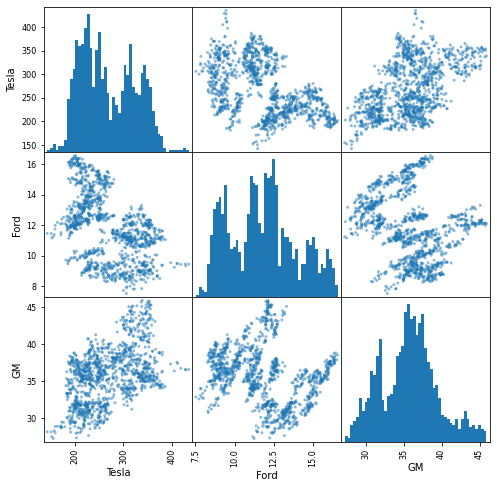

In [54]:
pd.plotting.scatter_matrix(car_comp, hist_kwds={'bins':50}, figsize=(8,8))

In [63]:
tesla['returns'] = tesla['Close'].pct_change() * 100
ford['returns'] = ford['Close'].pct_change() * 100
gm['returns'] = gm['Close'].pct_change() * 100

Text(0.5, 0, '% Returns')

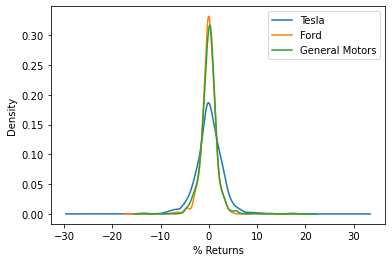

In [64]:
# KDE is a nomalised distribution

tesla['returns'].plot(kind='kde', label='Tesla')
ford['returns'].plot(kind='kde', label='Ford')
gm['returns'].plot(kind='kde', label='General Motors')
plt.legend()
plt.xlabel('% Returns')

# Box plots

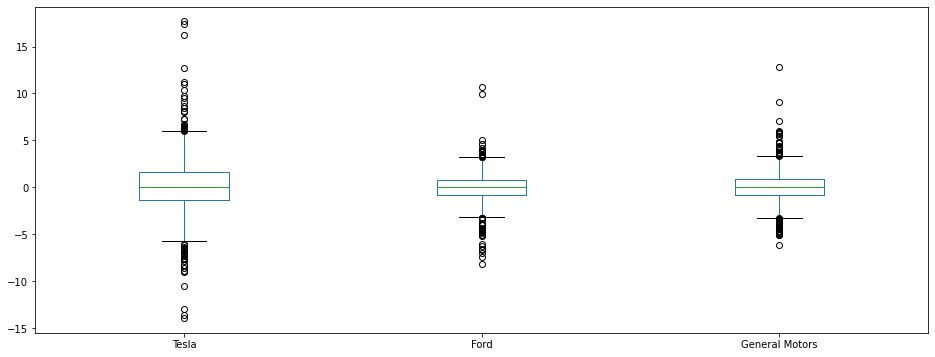

In [67]:
box_df = pd.concat(objs=[tesla['returns'], ford['returns'], gm['returns']], axis=1)
box_df.columns = ['Tesla', 'Ford', 'General Motors']
box_df.plot(kind='box', figsize=(16, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002B027508>,
      dtype=object)

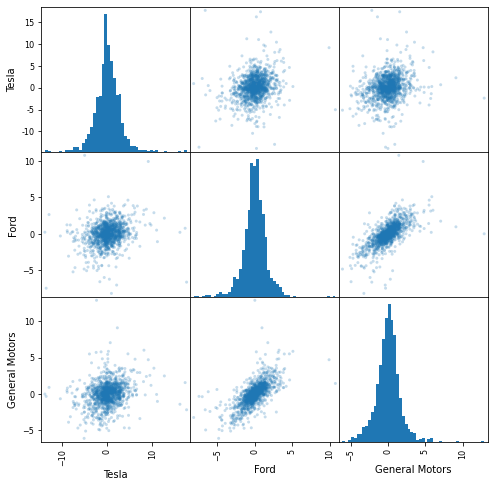

In [70]:
pd.plotting.scatter_matrix(box_df, figsize=(8, 8), hist_kwds={'bins':50}, alpha=0.25)

# Cumulative Return

In [74]:
(1 - tesla['returns'])

Date
2014-12-31         NaN
2015-01-02    2.393825
2015-01-05    5.204095
2015-01-06    0.433575
2015-01-07    1.156192
                ...   
2019-12-24   -0.438385
2019-12-26   -0.338037
2019-12-27    1.129948
2019-12-30    4.643290
2019-12-31    0.124675
Name: returns, Length: 1259, dtype: float64

In [75]:
(1 - tesla['returns']).cumprod()

Date
2014-12-31              NaN
2015-01-02     2.393825e+00
2015-01-05     1.245769e+01
2015-01-06     5.401343e+00
2015-01-07     6.244988e+00
                  ...      
2019-12-24   -3.889774e+169
2019-12-26    1.314888e+169
2019-12-27    1.485755e+169
2019-12-30    6.898790e+169
2019-12-31    8.601042e+168
Name: returns, Length: 1259, dtype: float64

In [76]:
(1 - ford['returns']).cumprod()

Date
2014-12-31             NaN
2015-01-02    1.903228e+00
2015-01-05    9.337706e+00
2015-01-06    1.819463e+01
2015-01-07   -3.407449e+01
                  ...     
2019-12-24    2.454340e-47
2019-12-26    2.972692e-47
2019-12-27    5.803832e-47
2019-12-30    1.262455e-46
2019-12-31    5.800445e-47
Name: returns, Length: 1259, dtype: float64

In [77]:
(1 - gm['returns']).cumprod()

Date
2014-12-31             NaN
2015-01-02    1.200515e+00
2015-01-05    2.957864e+00
2015-01-06   -1.522414e+00
2015-01-07    2.802384e+00
                  ...     
2019-12-24    2.405290e-40
2019-12-26    3.062848e-40
2019-12-27    2.391155e-40
2019-12-30    3.176016e-40
2019-12-31    1.781499e-40
Name: returns, Length: 1259, dtype: float64